# Задание

Реализовать модель сегрегации Шеллинга в Matplotlib. На двумерной сетке находятся агенты двух групп. На каждой клетке может находиться не более 1 агента. 

Агент "счастлив", если, как минимум, заданный процент ближайших соседей относится к его группе. В противном случае агент переезжает на иное, свободное место.

# Обоснование

Сегрегация - это разделение на группы. Модель Шеллинга изучает динамику изменения групп и показывает, как локальные взаимодействия могут привести к единой структуре.

# Что конкретно сделать?

Ввести следующие параметры: 

размер популяции, размеры сетки, процентное соотношение агентов двух групп, пороговое значение "толерантности", количество шагов моделирования.

1. Реализовать отображение агентов в виде квадратов двух цветов на целочисленной сетке.
2. Случайно разместить агентов, учитывая запрет на совпадение координат.
3. Реализовать функцию distance на основе метрики манхэттенского расстояния.
4. Реализовать функцию is_happy.
5. Изобразить график исходного расположения агентов и график расположения спустя N шагов моделирования.
6. Изобразить график изменения состояния "настроения" агентов.
(повышенной сложности) Реализовать анимацию шагов моделирования.

In [19]:
from math import sqrt
from random import seed, uniform

import matplotlib.pyplot as plt
%matplotlib inline

# Понятия

Предположим, у нас есть две группы: красные и зеленые агенты. 

Предположим, что существует 300 человек каждого типа. 
Все эти агенты живут на одном квадрате. 

Местоположение агента - это просто точка (x, y) (x, y), где 0 <x, y <10<x, y<1.

Агент счастлив, если половина или более из 10 его ближайших соседей относятся к одному типу. Здесь «ближайший» означает евклидово расстояние. 

# Поведение

Первоначально агенты перемешиваются. 

В частности, начальное местоположение каждого агента является независимым результатом двумерного равномерного распределения на S = (0,1) 2S = (0,1) 2. 

Теперь, циклически перебирая набор всех агентов, каждому агенту теперь дается возможность остаться или переехать. Мы предполагаем, что каждый агент останется на месте, если он счастлив, и двинется, если он несчастен. 

Алгоритм переезда следующий: 
1. Нарисуйте случайную локацию в СС 
2. Если счастлив на новом месте, переезжай туда 
В противном случае перейдите к шагу 1 

Таким образом, мы непрерывно перебираем агентов, перемещаясь по мере необходимости. Мы продолжаем цикл до тех пор, пока никто не захочет двигаться.

In [20]:
seed(10) # for generation

Введем необходимые переменные

In [21]:
num_red = 300
num_green = 300

neighbors_number = 10
same_type_number = 5

iterations_count = 1

In [22]:
class Agent:
    def draw_new_place(self):
          self.coordinates = uniform(0, 1), uniform(0, 1)

    def __init__(self, type):
        self.type = type
        self.draw_new_place()

    def get_distance(self, second):
        #The euclidean distance between agents
        first_agent = (self.coordinates[0] - second.coordinates[0])**2
        second_agent = (self.coordinates[1] - second.coordinates[1])**2
        return sqrt(first_agent + second_agent)

    def mood_happy(self, agents):
        lengths = [] #list of distance values between objects
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                lengths.append((distance, agent))
        
        lengths.sort()
        
        neighbors = [agent for d, agent in lengths[:neighbors_number]]
        num_same_type = sum(self.type == agent.type for agent in neighbors)
        
        return num_same_type >= same_type_number

    def change_mood(self, agents):
        while not self.mood_happy(agents):
            self.draw_new_place()

Приведем блок для визуализации сегрегации

In [23]:
def plot_results(agents, iterations_num):
    x_red, y_red = [], []
    x_green, y_green = [], []

    for agent in agents:
        x, y = agent.coordinates
        if agent.type == 0:
            x_red.append(x)
            y_red.append(y)
        else:
            x_green.append(x)
            y_green.append(y)
    
    fig, ax = plt.subplots(figsize=(3, 3))
    plot_args = {'markersize': 8, 'alpha': 0.6}

    ax.plot(x_red, y_red, 'o', markerfacecolor='red', **plot_args)
    ax.plot(x_green, y_green, 'o', markerfacecolor='green', **plot_args)
    ax.set_title(f'Iteration {iterations_num-1}')
    
    plt.show()

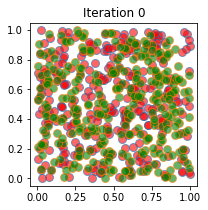

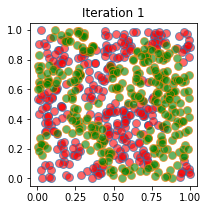

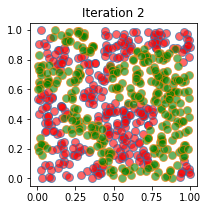

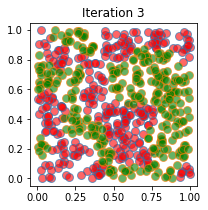

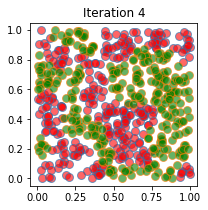

In [24]:
agents = [Agent(0) for i in range(num_red)]
agents.extend(Agent(1) for i in range(num_green))

while True:
    plot_results(agents, iterations_count)
    iterations_count += 1
    moved_variable = True

    for agent in agents:
        prev_coordinates = agent.coordinates
        agent.change_mood(agents)
        if agent.coordinates != prev_coordinates:
            moved_variable = False
    if moved_variable:
        break